In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prep
%matplotlib inline
import librosa.display
import IPython.display as ipd
import noisereduce as nr
import soundfile as sf

C:\Users\iamry\anaconda3\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
SAMPLE_PATH = 'samples//sample.wav'
NOISE_PATH = 'samples//noise.wav'
NORMALIZED_SAMPLE_PATH = 'samples//normalized_sample.wav'
NORMALIZED_NOISE_PATH = 'samples//normalized_noise.wav'

In [8]:
y, sr = librosa.load(SAMPLE_PATH, sr=None)

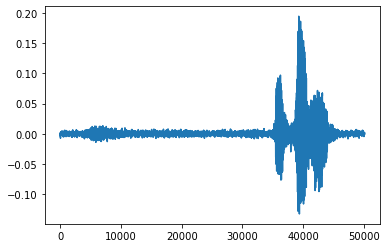

1.1783952644529876


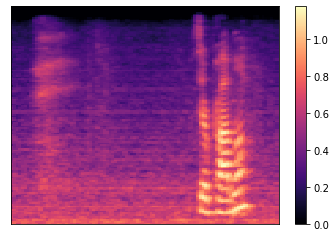

In [16]:
plt.plot(y)
plt.show()
mel1 = librosa.feature.melspectrogram(y, sr=sr)
mel1 = librosa.power_to_db(mel1)
mel1 = librosa.util.normalize(mel1) + 1
print(mel1.max())
librosa.display.specshow(mel1)
plt.colorbar()
plt.show()

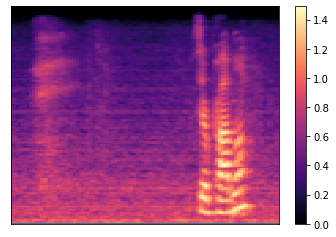

0.0


In [21]:
y_norm = librosa.util.normalize(y)
plt.plot(y_norm)
mel2 = librosa.feature.melspectrogram(y_norm, sr=sr)
mel2 = librosa.power_to_db(mel2)
mel2 = librosa.util.normalize(mel2) + 1
librosa.display.specshow(mel2, cmap='magma')
plt.colorbar()
plt.show()
print((mel1 - mel2).max())

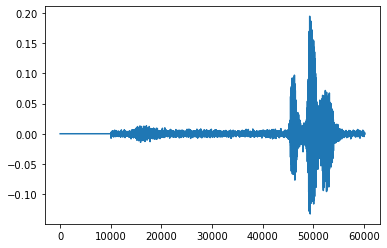

In [10]:
segment = 10000
silence = np.zeros(segment)
y = np.concatenate((silence, y))
plt.plot(y)

In [11]:
ipd.Audio(y, rate=sr)

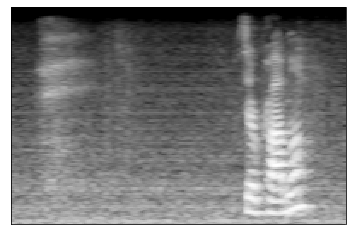

50084
195.640625
(144, 196)


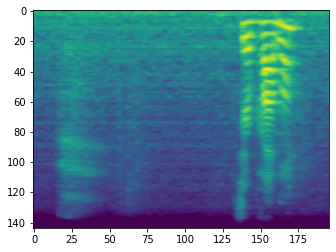

In [27]:
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=144)
mel = librosa.power_to_db(mel)
librosa.display.specshow(mel, cmap='Greys_r')
plt.show()
print(len(y))
print(len(y)/256)
print(mel.shape)
plt.imshow(mel)

In [28]:
y_sample, sr_sample = librosa.load(SAMPLE_PATH)
y_noise, sr_noise = librosa.load(NOISE_PATH)
noise_reduced = nr.reduce_noise(audio_clip=y_sample, noise_clip=y_noise, prop_decrease=1, verbose=False, n_std_thresh=1.8)
librosa.output.write_wav('samples//sample-noisereduced-librosa_normalized.wav', y=noise_reduced, sr=sr_sample, norm=True)

In [8]:
librosa.output.write_wav(NORMALIZED_NOISE_PATH, y=y_noise, sr=sr_noise, norm=True)
librosa.output.write_wav(NORMALIZED_SAMPLE_PATH, y=y_sample, sr=sr_sample, norm=True)

In [29]:
y_sample, sr_sample = librosa.load(NORMALIZED_SAMPLE_PATH)
y_noise, sr_noise = librosa.load(NORMALIZED_NOISE_PATH)
noise_reduced = nr.reduce_noise(audio_clip=y_sample, noise_clip=y_noise, prop_decrease=1.0, verbose=False, n_std_thresh=1.8)
librosa.output.write_wav('samples//sample-normalized-noisereduced.wav', y=noise_reduced, sr=sr_sample, norm=False)

In [56]:
y_norm_nr, sr_norm_nr = librosa.load('samples\\sample-normalized-noisereduced.wav', sr=None)
y_nr_norm, sr_nr_norm = librosa.load('samples\\sample-noisereduced-librosa_normalized.wav', sr=None)
y_original, sr_original = librosa.load('samples\\sample.wav', sr=None)
y_nr_norm_compress_norm, sr_nr_norm_compress_norm = librosa.load('samples//sample-noisereduced-librosa_normalized_compressed_norm.wav', sr=None)

In [57]:
original_melspec = librosa.feature.melspectrogram(y=y_original, 
                                                  sr=sr_original, 
                                                  n_fft=2048, 
                                                  hop_length=512)
norm_nr_melspec = librosa.feature.melspectrogram(y=y_norm_nr, 
                                                  sr=sr_norm_nr, 
                                                  n_fft=2048, 
                                                  hop_length=512)
nr_norm_melspec = librosa.feature.melspectrogram(y=y_nr_norm, 
                                                  sr=sr_nr_norm, 
                                                  n_fft=2048, 
                                                  hop_length=512)
nr_norm_compress_norm_melspec = librosa.feature.melspectrogram(y=y_nr_norm_compress_norm, 
                                                  sr=sr_nr_norm_compress_norm, 
                                                  n_fft=2048, 
                                                  hop_length=512)
original_melspec = librosa.power_to_db(original_melspec)
norm_nr_melspec = librosa.power_to_db(norm_nr_melspec)
nr_norm_melspec = librosa.power_to_db(nr_norm_melspec)
nr_norm_compress_norm_melspec = librosa.power_to_db(nr_norm_compress_norm_melspec)

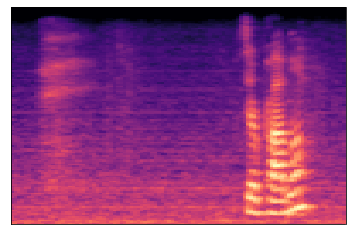

In [35]:
librosa.display.specshow(original_melspec, sr=sr_original, cmap='magma')

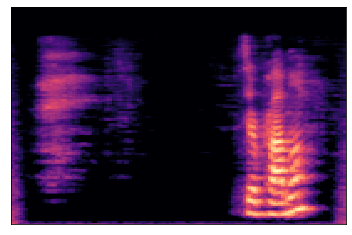

In [36]:
librosa.display.specshow(norm_nr_melspec, sr=sr_norm_nr, cmap='magma')

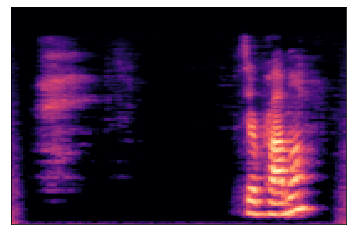

In [37]:
librosa.display.specshow(nr_norm_melspec, sr=sr_nr_norm, cmap='magma')

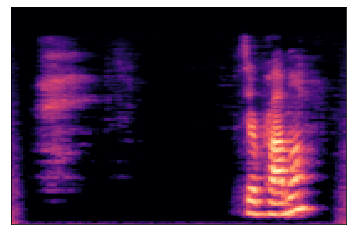

In [58]:
librosa.display.specshow(nr_norm_compress_norm_melspec, sr=sr_original, cmap='magma')

In [ ]:
sample = AudioSegment.from_wav('noise_reduced_than_normalized.wav')
sample = pydub.effects.normalize(sample, headroom=0.05)
sample.export('noise_reduced_than_normalized_norm.wav')

In [ ]:
sample = AudioSegment.from_wav(SAMPLE_PATH)
sample = pydub.effects.normalize(sample, headroom=0.05)
sample.export('normalized_than_noise_reduced.wav')

In [ ]:
y_sample, sr_sample = librosa.load('normalized_than_noise_reduced.wav')
y_noise, sr_noise = librosa.load(NOISE_PATH)
noise_reduced = nr.reduce_noise(audio_clip=y_sample, noise_clip=y_noise, prop_decrease=1.0, verbose=True)
sf.write('normalized_than_noise_reduced_reduced.wav', noise_reduced, sr_sample)

In [55]:
audio_pydub = AudioSegment.from_wav('samples//sample-noisereduced-librosa_normalized.wav')
compressed = pydub.effects.compress_dynamic_range(audio_pydub, threshold=-24.0, ratio=2.0, attack=15.0, release=40.0)
compressed = pydub.effects.normalize(compressed)
samples_pydub = np.array(audio_pydub.get_array_of_samples(), dtype=np.float32)
samples_pydub = librosa.util.normalize(samples_pydub)
print(samples_pydub)
print(samples_pydub.size)
print(compressed.frame_rate)
librosa.output.write_wav('samples//sample-noisereduced-librosa_normalized_compressed_norm.wav', y=samples_pydub, sr=22050, norm=False)

[-0.00158498 -0.00142452 -0.00023761 ...  0.00154469  0.0023198
 -0.00085732]
69023
22050


In [46]:
audio_librosa, frame_rate = librosa.load('samples//sample-noisereduced-librosa_normalized.wav')
print(audio_librosa)
print(audio_librosa.size)
print(frame_rate)

[-0.00158691 -0.00143433 -0.00024414 ...  0.0015564   0.00231934
 -0.00085449]
69023
22050
